In [39]:
import pandas as pd
import numpy as np

In [41]:
#imporatando el archivo

In [42]:
prediccion_social_n_ads = pd.read_excel('Social_Network_Ads.xlsx')

In [43]:
#para mostrar datos
prediccion_social_n_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [45]:
#promedio de la variable: "Purchased"
np.average(prediccion_social_n_ads.Purchased)

0.3575

In [48]:
#Definiendo variables
x = prediccion_social_n_ads.iloc[:,[2,3]].values
y = prediccion_social_n_ads.iloc[:,4].values

In [49]:
# Division de entrenamiento y prueba por medio de sklearn

In [50]:
from sklearn.model_selection import train_test_split
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x,y,test_size = 0.3, random_state=0)

In [51]:
# realizando el escalado de variables, para la regresión logística:
from sklearn.preprocessing import StandardScaler
standard_x =StandardScaler()
x_entrenamiento = standard_x.fit_transform(x_entrenamiento)
x_prueba = standard_x.fit_transform(x_prueba)

In [52]:
# mostrando las variables escaladas:
x_entrenamiento

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [53]:
# entrenando el modelo de regresión logítica


In [54]:
# ajustando el modelo
from sklearn.linear_model import LogisticRegression
regresionLog = LogisticRegression(random_state=0)
regresionLog.fit(x_entrenamiento, y_entrenamiento)

LogisticRegression(random_state=0)

In [55]:
# Predicción
predic = regresionLog.predict(x_prueba)

In [57]:
# mostrando la el valor de la predicción(predic) y comparándolo con el valor de testeo(y_prueba)
predic, y_prueba

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 1]))

In [58]:
# Evaluando mediante la matriz de confusión
from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(y_prueba, predic)
confu_mat

array([[75,  4],
       [ 9, 32]])

In [60]:
# Ahora mediante la función len vamos a ver cuántos elementos tiene la variable (y_prueba)
len(y_prueba)

120

In [61]:
# Ahora si dividimos 75 entre la longitud de (y_prueba) obtendremos el valor aproximado del modelo:
75/len(y_prueba)

0.625

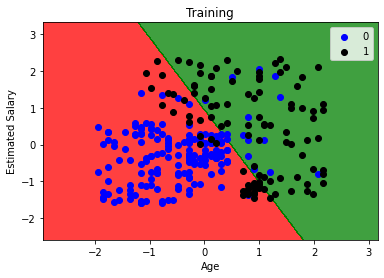

In [62]:
# Graficando la regresión logística del modelo realizado:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = x_entrenamiento, y_entrenamiento
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regresionLog.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Training')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()